In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #magic function to embed all the graphs in the python notebook

In [3]:
df_salary=pd.read_csv("Salary_Data.csv")

In [4]:
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


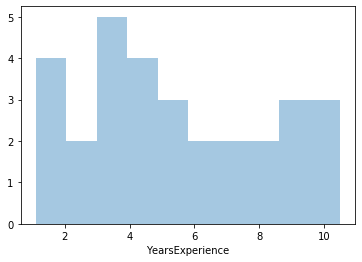

In [7]:
sns.distplot(df_salary['YearsExperience'],kde=False,bins=10)

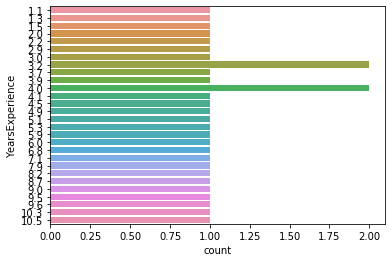

In [8]:
sns.countplot(y='YearsExperience',data=df_salary)

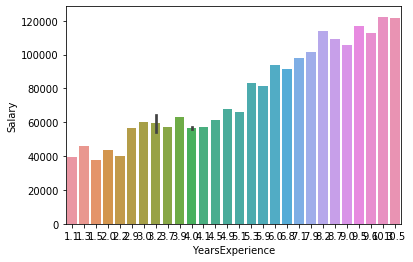

In [9]:
sns.barplot(x='YearsExperience',y='Salary',data=df_salary)

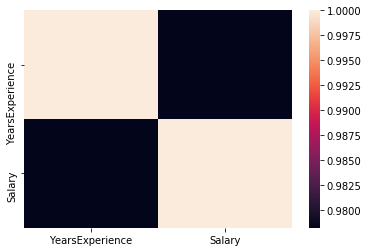

In [11]:
sns.heatmap(df_salary.corr())

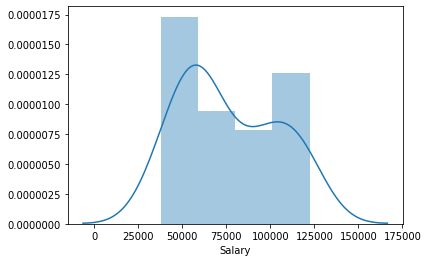

In [12]:
sns.distplot(df_salary.Salary)

In [13]:
X=df_salary.iloc[:,:-1].values
y=df_salary.iloc[:,:1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)
#splitting the data using this module and setting the test size as 1/3 . Rest 2/3 is used for training the data.

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=lr.predict(X_test)
y_pred

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

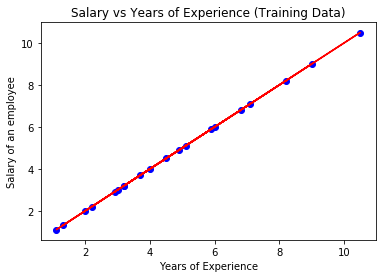

In [17]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title('Salary vs Years of Experience (Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

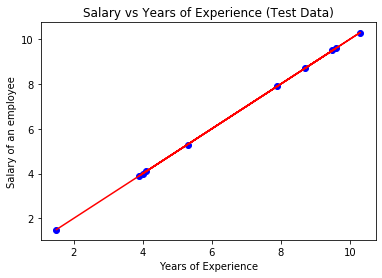

In [18]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,lr.predict(X_test),color='red')
plt.title('Salary vs Years of Experience (Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

In [22]:
#Calculating the errors so as to check the difference between the actual value and predicted model value. There are certain metrics to find these error such as Mean Squared Error, Root Mean Squared Error and Mean Absolute Error.
from sklearn import metrics
print('Mean Absolute Error of the Model:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error of the Model: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error of the Model: ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error of the Model: 2.886579864025407e-16
Mean Squared Error of the Model:  3.7963931063761194e-31
Root Mean Squared Error of the Model:  1.698993779866603e-08


In [21]:
#Looking at the values we see that the error is very minute and hence we can see our model gives very accurate values

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) #R value lies between 0 to 1. Value of 1 represents it is completely accurate

1.0

In [24]:
import pickle

In [25]:
salarypickl='salary.pkl'

In [27]:
pickle.dump(lr,open(salarypickl,'wb'))

done:)